# <b>`PROJECT`</b>: Identifying Shopping Trends using Data Analysis

<div class="alert alert-block alert-info"><b>importing dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<div class="alert alert-block alert-info"><b>Loading Dataset

In [3]:
df = pd.read_csv('shopping_trends.csv')

<div class="alert alert-block alert-info"><b>Exploring Dataset

In [4]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


## Questions:

<div class= "alert alert-block alert-success">
    <b>These questions should give me a starting point to explore various aspects of the Shopping trends dataset.</b></div>

## `1. What is the overall distribution of customer ages in the dataset?`

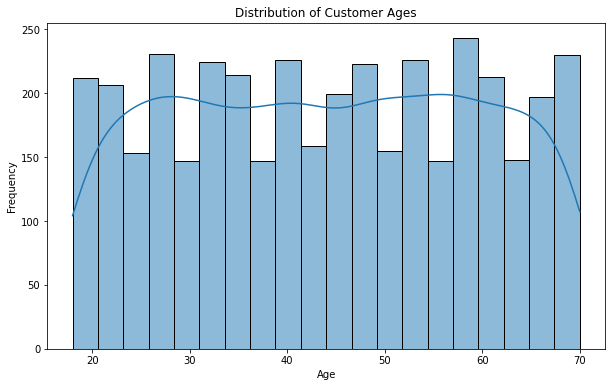

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## `2. How does the average purchase amount vary across different product categories?`

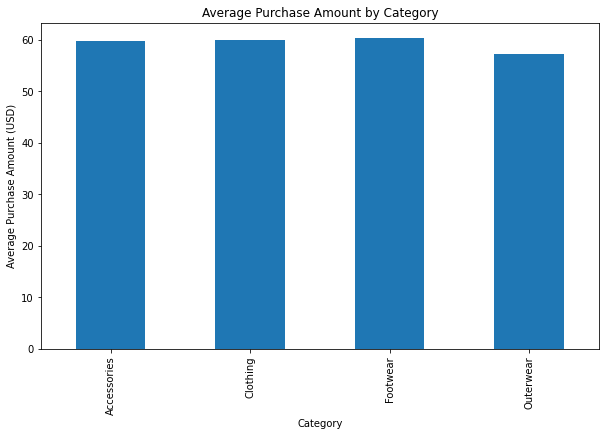

In [6]:
avg_purchase_by_category = df.groupby('Category')['Purchase Amount (USD)'].mean()
avg_purchase_by_category.plot(kind='bar', figsize=(10, 6))
plt.title('Average Purchase Amount by Category')
plt.xlabel('Category')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

## `3. Which gender has the highest number of purchases?`

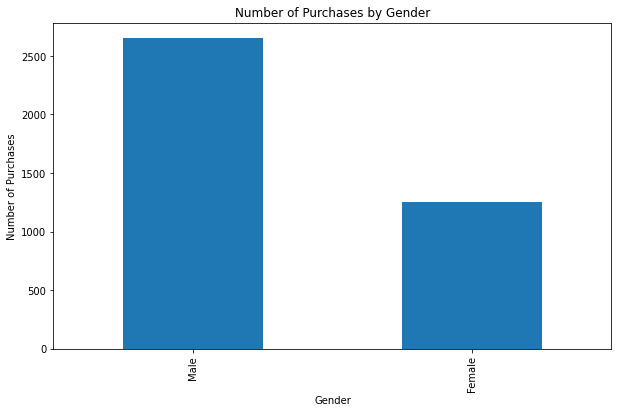

In [8]:
gender_counts = df['Gender'].value_counts()
gender_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Purchases by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Purchases')
plt.show()

## `4. What are the most commonly purchased items in each category?`

In [9]:
common_items = df.groupby('Category')['Item Purchased'].apply(lambda x: x.mode()[0])
print(common_items)

Category
Accessories    Jewelry
Clothing        Blouse
Footwear       Sandals
Outerwear       Jacket
Name: Item Purchased, dtype: object


## `5. Are there any specific seasons or months where customer spending is significantly higher?`

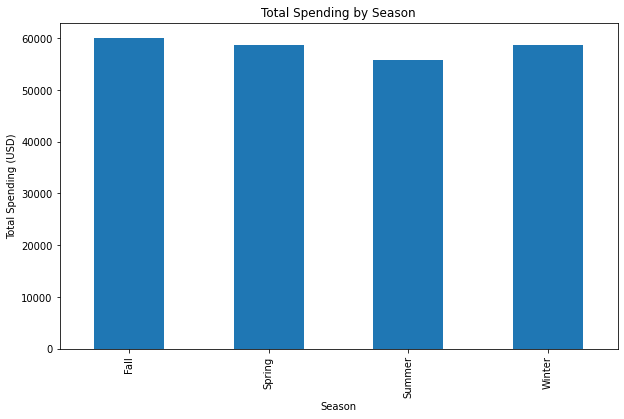

In [10]:
seasonal_spending = df.groupby('Season')['Purchase Amount (USD)'].sum()
seasonal_spending.plot(kind='bar', figsize=(10, 6))
plt.title('Total Spending by Season')
plt.xlabel('Season')
plt.ylabel('Total Spending (USD)')
plt.show()

## `6. What is the average rating given by customers for each product category?`

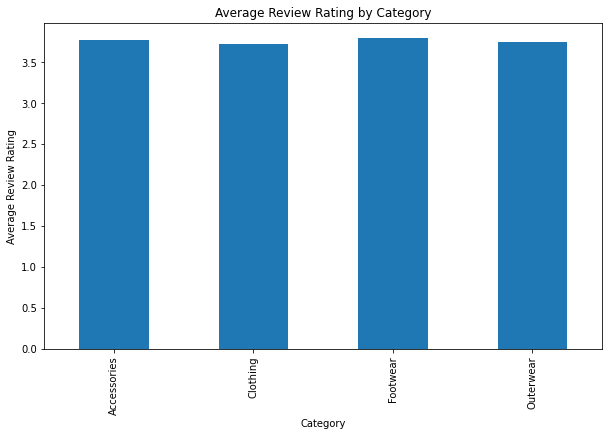

In [11]:
avg_rating_by_category = df.groupby('Category')['Review Rating'].mean()
avg_rating_by_category.plot(kind='bar', figsize=(10, 6))
plt.title('Average Review Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average Review Rating')
plt.show()

## `7. Are there any notable differences in purchase behavior between subscribed and non-subscribed customers?`

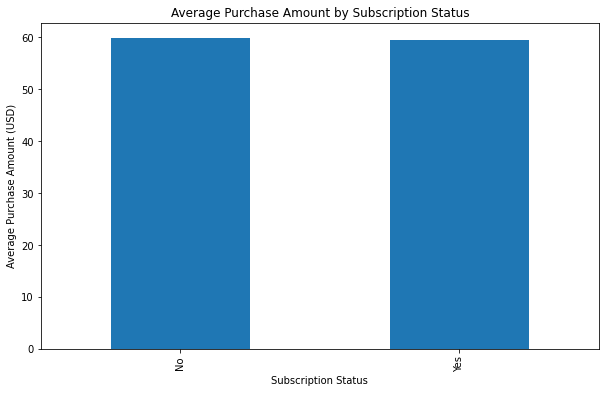

In [13]:
subscription_behavior = df.groupby('Subscription Status')['Purchase Amount (USD)'].mean()
subscription_behavior.plot(kind='bar', figsize=(10, 6))
plt.title('Average Purchase Amount by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

## `8. Which payment method is the most popular among customers?`

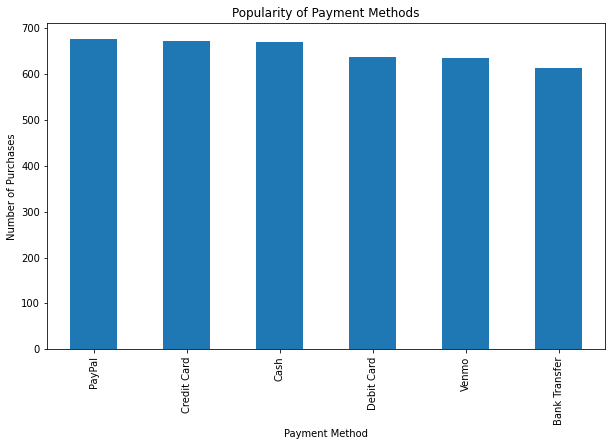

In [15]:
payment_method_counts = df['Payment Method'].value_counts()
payment_method_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Popularity of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Number of Purchases')
plt.show()

## `9. Do customers who use promo codes tend to spend more than those who don't?`

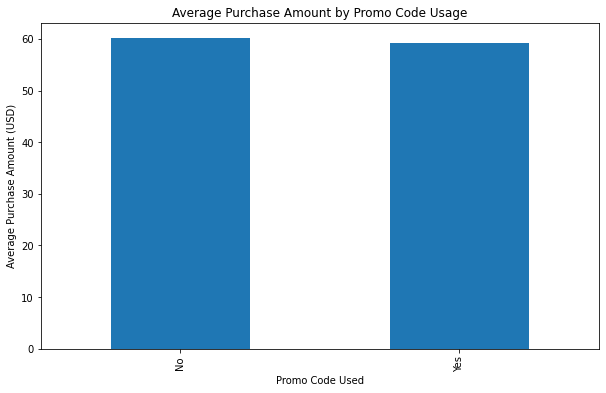

In [17]:
promo_code_spending = df.groupby('Promo Code Used')['Purchase Amount (USD)'].mean()
promo_code_spending.plot(kind='bar', figsize=(10, 6))
plt.title('Average Purchase Amount by Promo Code Usage')
plt.xlabel('Promo Code Used')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

## `10. How does the frequency of purchases vary across different age groups?`

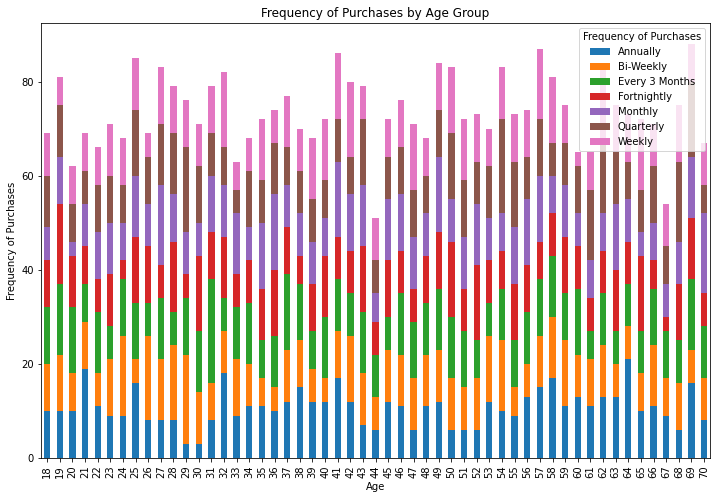

In [19]:
age_group_frequency = df.groupby('Age')['Frequency of Purchases'].value_counts().unstack().fillna(0)
age_group_frequency.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Frequency of Purchases by Age Group')
plt.xlabel('Age')
plt.ylabel('Frequency of Purchases')
plt.show()

## `11. Are there any correlations between the size of the product and the purchase amount?`

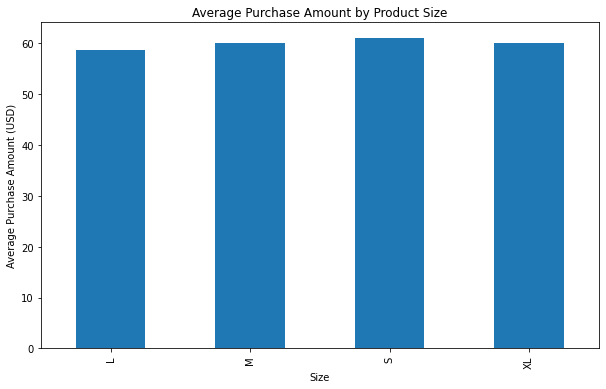

In [21]:
size_purchase_correlation = df.groupby('Size')['Purchase Amount (USD)'].mean()
size_purchase_correlation.plot(kind='bar', figsize=(10, 6))
plt.title('Average Purchase Amount by Product Size')
plt.xlabel('Size')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

## `12. Which shipping type is preferred by customers for different product categories?`

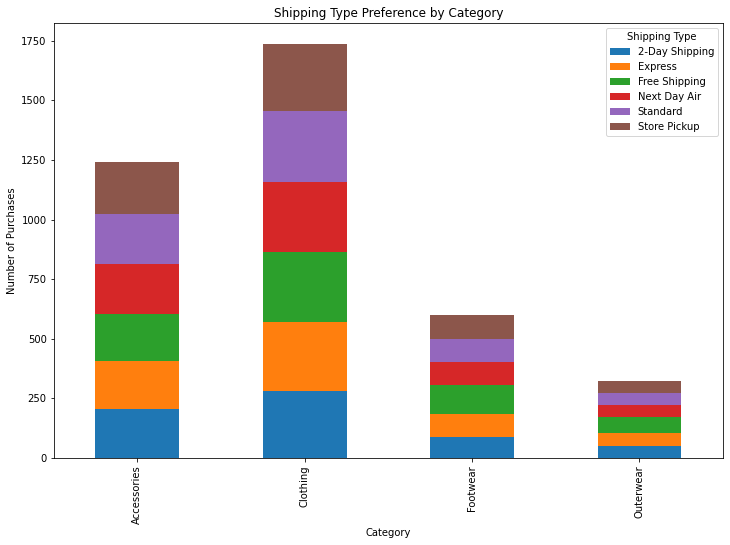

In [23]:
shipping_preference = df.groupby(['Category', 'Shipping Type']).size().unstack().fillna(0)
shipping_preference.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Shipping Type Preference by Category')
plt.xlabel('Category')
plt.ylabel('Number of Purchases')
plt.show()

## `13. How does the presence of a discount affect the purchase decision of customers?`

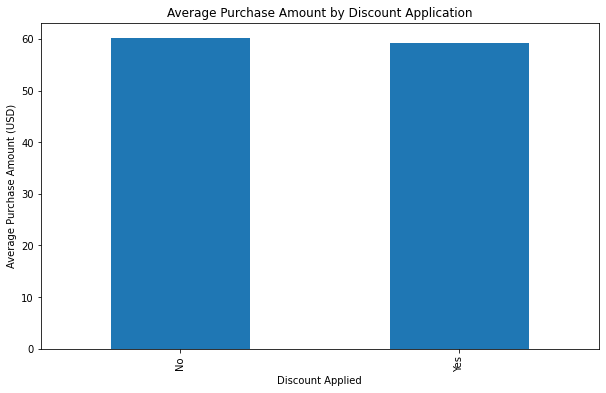

In [25]:
discount_effect = df.groupby('Discount Applied')['Purchase Amount (USD)'].mean()
discount_effect.plot(kind='bar', figsize=(10, 6))
plt.title('Average Purchase Amount by Discount Application')
plt.xlabel('Discount Applied')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

## `14. Are there any specific colors that are more popular among customers?`

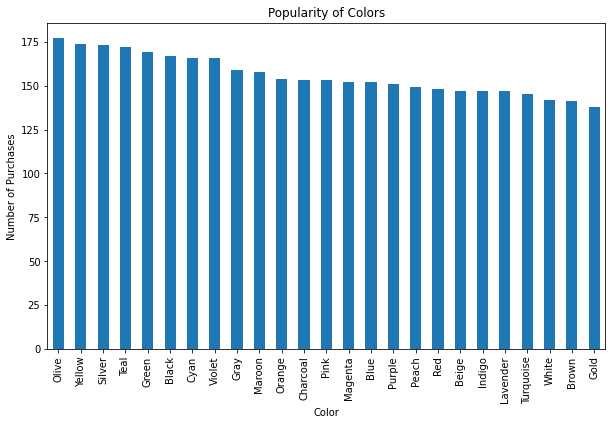

In [27]:
color_popularity = df['Color'].value_counts()
color_popularity.plot(kind='bar', figsize=(10, 6))
plt.title('Popularity of Colors')
plt.xlabel('Color')
plt.ylabel('Number of Purchases')
plt.show()

## `15. What is the average number of previous purchases made by customers?`

In [29]:
avg_previous_purchases = df['Previous Purchases'].mean()
print(f'Average number of previous purchases: {avg_previous_purchases}')

Average number of previous purchases: 25.35153846153846


## `16. How does the purchase amount differ based on the review ratings given by customers?`

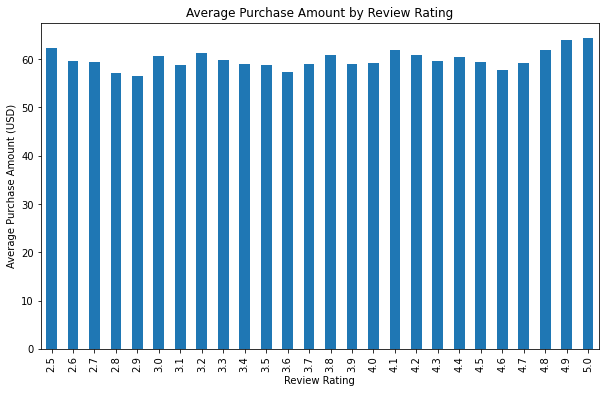

In [31]:
rating_purchase = df.groupby('Review Rating')['Purchase Amount (USD)'].mean()
rating_purchase.plot(kind='bar', figsize=(10, 6))
plt.title('Average Purchase Amount by Review Rating')
plt.xlabel('Review Rating')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

## `17. Are there any noticeable differences in purchase behavior between different locations?`

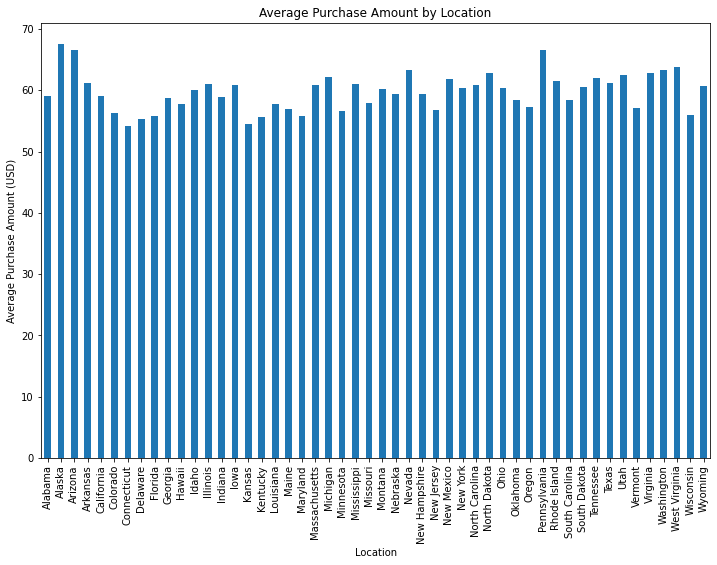

In [33]:
location_purchase = df.groupby('Location')['Purchase Amount (USD)'].mean()
location_purchase.plot(kind='bar', figsize=(12, 8))
plt.title('Average Purchase Amount by Location')
plt.xlabel('Location')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

## `18. Is there a relationship between customer age and the category of products they purchase?`

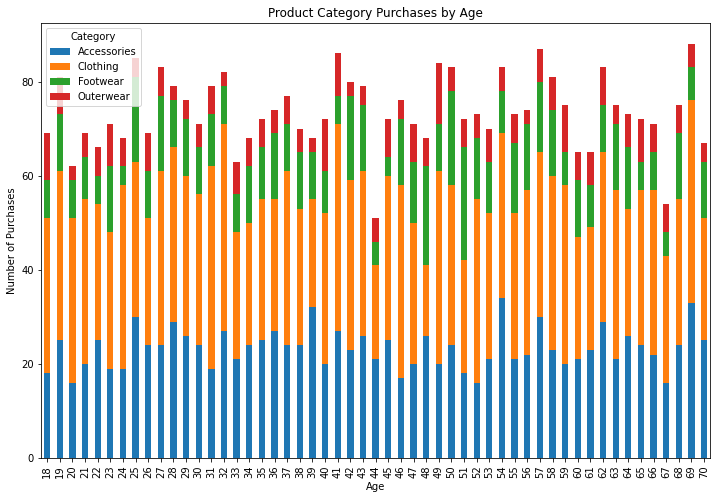

In [35]:
age_category = df.groupby(['Age', 'Category']).size().unstack().fillna(0)
age_category.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Product Category Purchases by Age')
plt.xlabel('Age')
plt.ylabel('Number of Purchases')
plt.show()

## `19. How does the average purchase amount differ between male and female customers?`

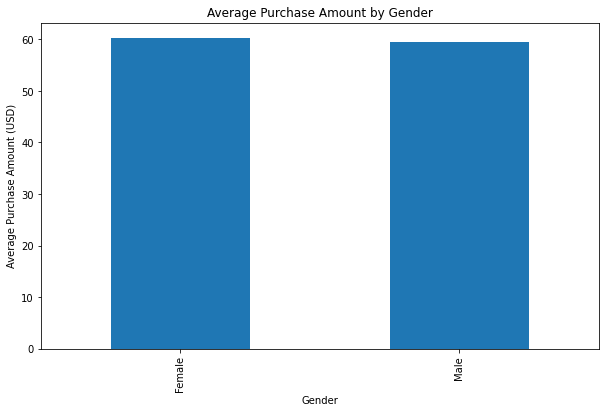

In [37]:
gender_purchase = df.groupby('Gender')['Purchase Amount (USD)'].mean()
gender_purchase.plot(kind='bar', figsize=(10, 6))
plt.title('Average Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

<div class= "alert alert-block alert-success">
<b>These are additional questions that will help in further identifying shopping trends and gaining deeper insights into customer behavior</b></div>

## `20. Are there any patterns in the payment methods used by different age groups?`

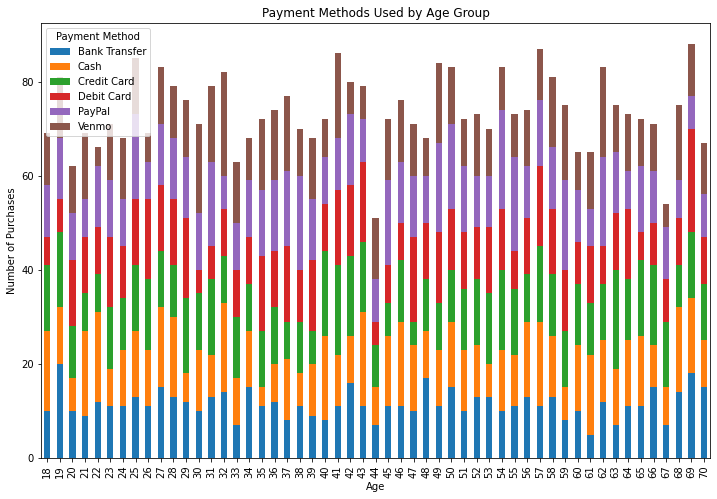

In [40]:
age_payment = df.groupby(['Age', 'Payment Method']).size().unstack().fillna(0)
age_payment.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Payment Methods Used by Age Group')
plt.xlabel('Age')
plt.ylabel('Number of Purchases')
plt.show()

## `21. How does the purchase amount vary by season and gender?`

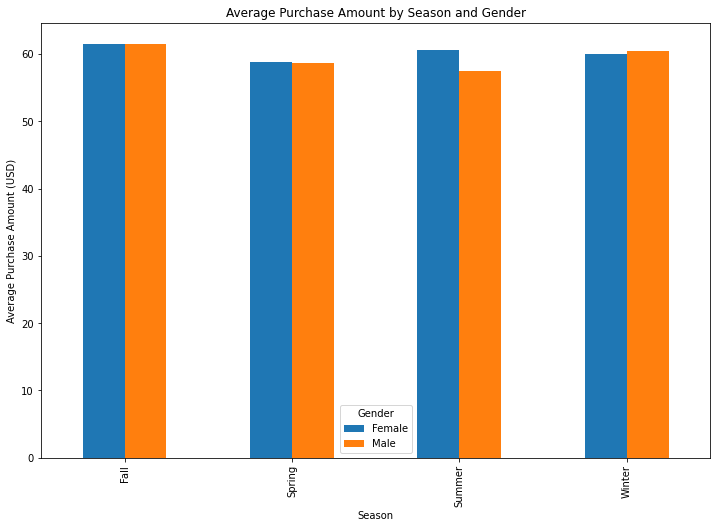

In [42]:
season_gender_purchase = df.groupby(['Season', 'Gender'])['Purchase Amount (USD)'].mean().unstack()
season_gender_purchase.plot(kind='bar', figsize=(12, 8))
plt.title('Average Purchase Amount by Season and Gender')
plt.xlabel('Season')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

## `22. What is the distribution of review ratings across different product categories?`

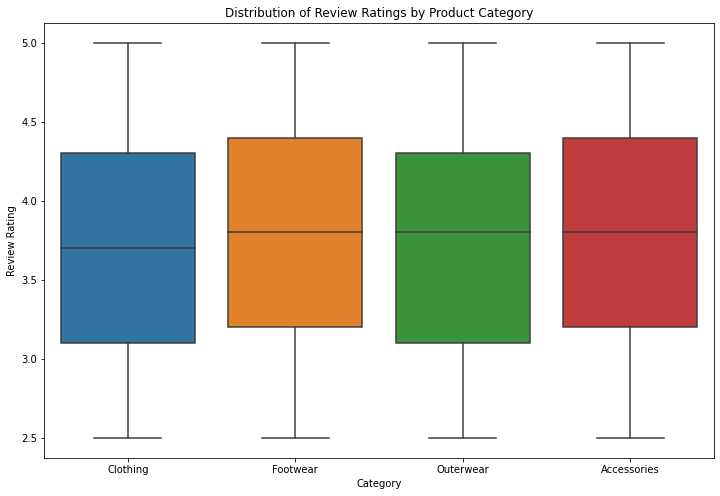

In [44]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Review Rating', data=df)
plt.title('Distribution of Review Ratings by Product Category')
plt.xlabel('Category')
plt.ylabel('Review Rating')
plt.show()

## `23. Are there any correlations between the number of previous purchases and the purchase amount?`

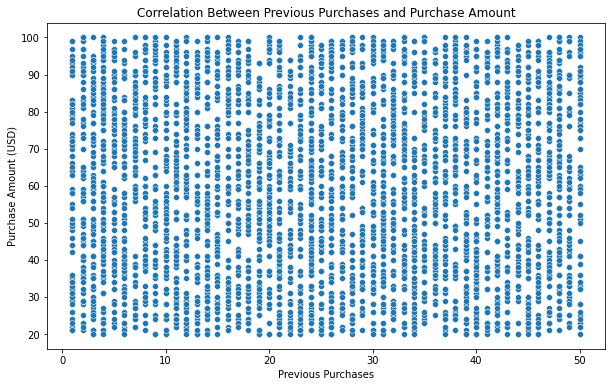

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Previous Purchases', y='Purchase Amount (USD)', data=df)
plt.title('Correlation Between Previous Purchases and Purchase Amount')
plt.xlabel('Previous Purchases')
plt.ylabel('Purchase Amount (USD)')
plt.show()

## `24. What is the relationship between the discount applied and the review rating?`

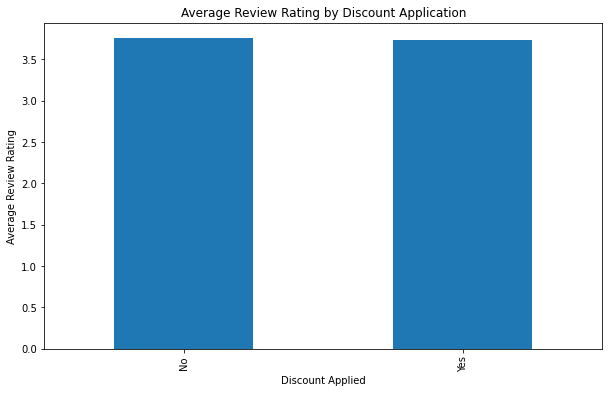

In [48]:
discount_rating = df.groupby('Discount Applied')['Review Rating'].mean()
discount_rating.plot(kind='bar', figsize=(10, 6))
plt.title('Average Review Rating by Discount Application')
plt.xlabel('Discount Applied')
plt.ylabel('Average Review Rating')
plt.show()

## `25. Are there any trends in the types of products purchased by customers with different subscription statuses?`

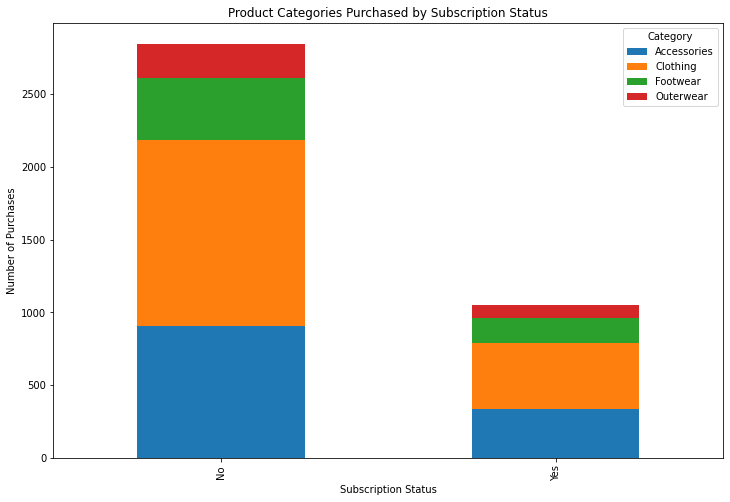

In [50]:
subscription_category = df.groupby(['Subscription Status', 'Category']).size().unstack().fillna(0)
subscription_category.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Product Categories Purchased by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Number of Purchases')
plt.show()